<a href="https://colab.research.google.com/github/halimatu001/Data_Science_Assignment/blob/main/Week_5_ADAP_FE_23_83785742_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KDE Plot - Age vs. Heart Attack Outcome
● Modify the KDE plot to include shade=True, adjust bw_adjust for better
smoothing, and use a different palette for better contrast.
● Add a vertical line indicating the median age of patients who had a heart
attack.
● Title: "Age Distribution by Heart Attack Outcome"
● X-axis Label: "Age (Years)"
● Y-axis Label: "Density"

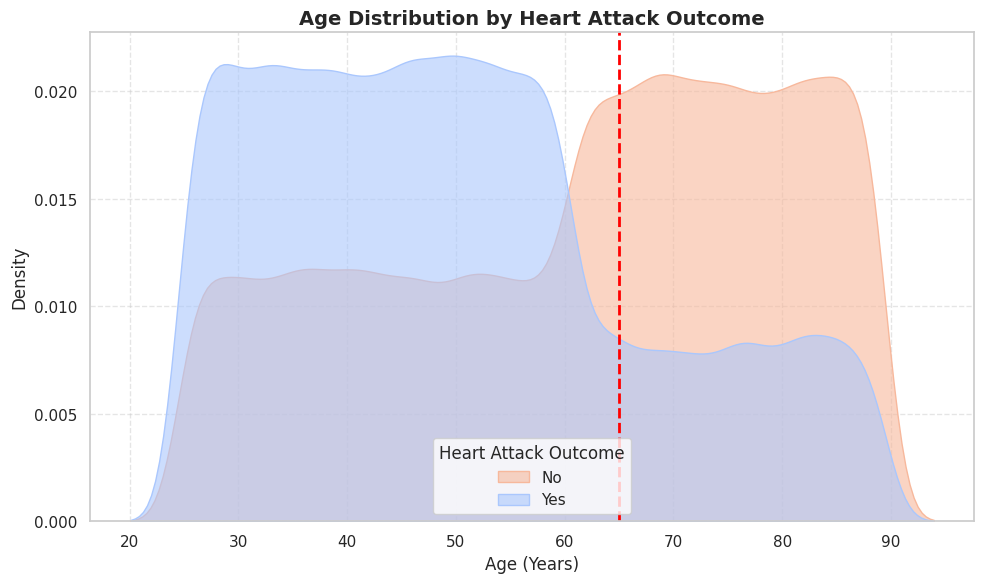

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/3MTT Deeptech /heart_attack_south_africa.csv')
df.head()

# Clean data: drop missing values in relevant columns
df = df.dropna(subset=['Age', 'Heart_Attack_Outcome'])
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df.dropna(subset=['Age'])

# Set seaborn style
sns.set(style="whitegrid")

# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x='Age',
    hue='Heart_Attack_Outcome',
    fill=True,
    bw_adjust=0.8,
    palette='coolwarm',
    common_norm=False,
    alpha=0.6
)

# Add vertical line for median age of those with heart attack
median_age = df[df['Heart_Attack_Outcome'] == 1]['Age'].median()
plt.axvline(median_age, color='red', linestyle='--', linewidth=2,
            label=f'Median Age (Heart Attack): {median_age:.1f}')

# Add labels and title
plt.title('Age Distribution by Heart Attack Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Heart Attack Outcome', labels=['No', 'Yes'])

# Show plot
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()




2. Heatmap - Correlation of Risk Factors
● Generate a correlation matrix heatmap.
● Adjust annotations, color map, and mask half the heatmap for better
readability.
● Ensure the most correlated features are highlighted distinctly.
● Title: "Correlation of Heart Attack Risk Factors"
● X-axis Label & Y-axis Label: Feature Names

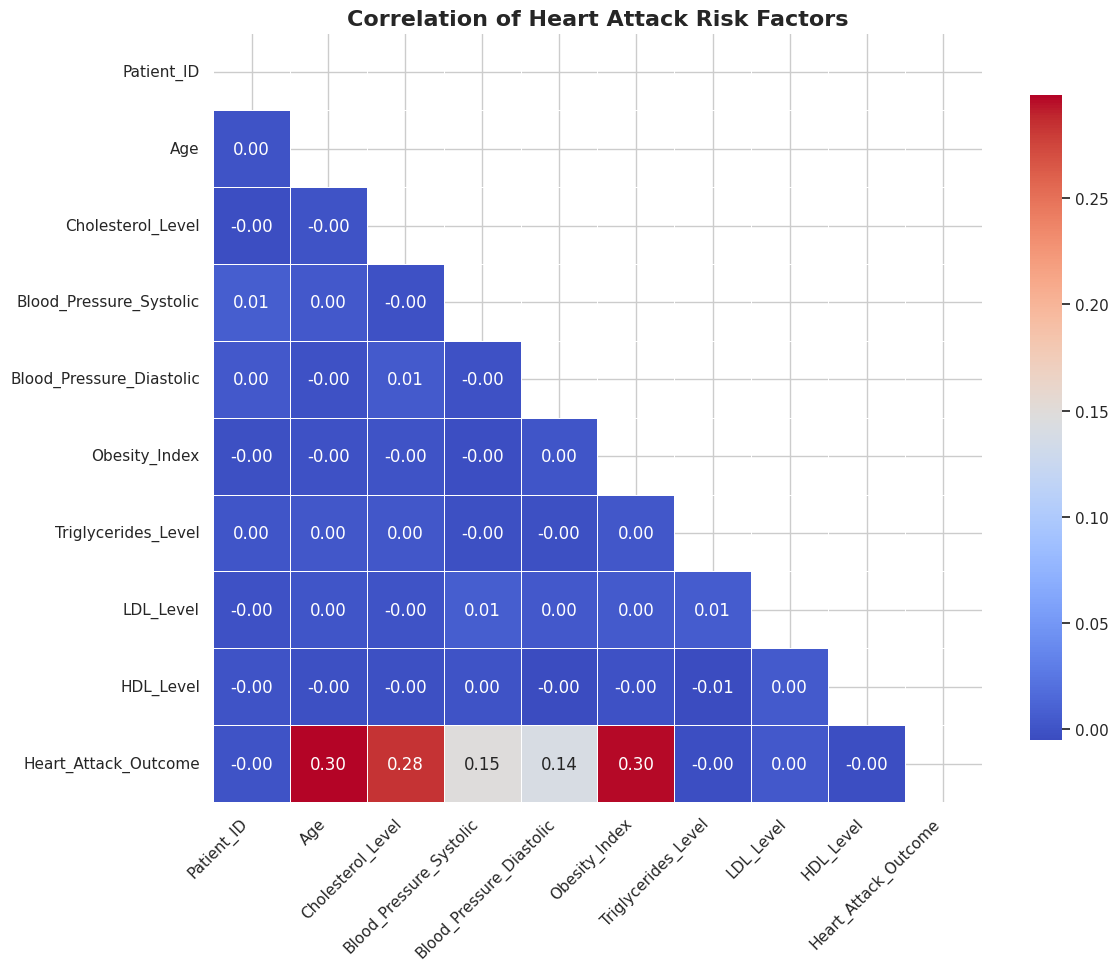

In [8]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',         # Use diverging color palette
    annot=True,              # Show correlation values
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},  # Color bar size
    square=True              # Make cells square
)

# Add title and axis labels
plt.title('Correlation of Heart Attack Risk Factors', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


3. Boxplot - Cholesterol Levels by Heart Attack Outcome
● Modify the boxplot to include hue="Gender" to compare cholesterol levels
across males and females.
● Adjust outlier visibility and tweak whiskers to better visualize cholesterol
distribution.
● Title: "Cholesterol Levels Distribution by Heart Attack Outcome and Gender"
● X-axis Label: "Heart Attack Outcome (0 = No, 1 = Yes)"
● Y-axis Label: "Cholesterol Level (mg/dL)"

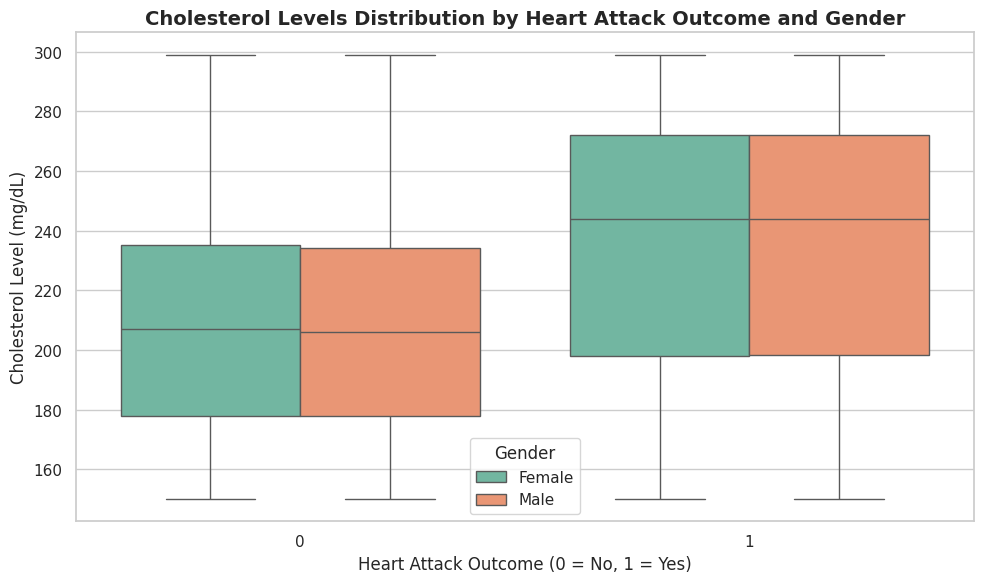

In [9]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='Heart_Attack_Outcome',
    y='Cholesterol_Level',
    hue='Gender',
    palette='Set2',
    showfliers=False,     # Hides outliers for better clarity
    whis=1.5              # Adjust whiskers to 1.5*IQR
)

# Add title and labels
plt.title('Cholesterol Levels Distribution by Heart Attack Outcome and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Cholesterol Level (mg/dL)', fontsize=12)
plt.legend(title='Gender')

# Display plot
plt.tight_layout()
plt.show()


4. Pairplot - Multiple Risk Factors & Outcome
● Create a pairplot including Cholesterol_Level, Obesity_Index, LDL_Level,
and Heart_Attack_Outcome.
● Adjust markers, increase plot size, and set diag_kind="kde" for better
insight.
● Title: "Pairwise Comparison of Key Risk Factors"
● X-axis Label & Y-axis Label: Feature Names

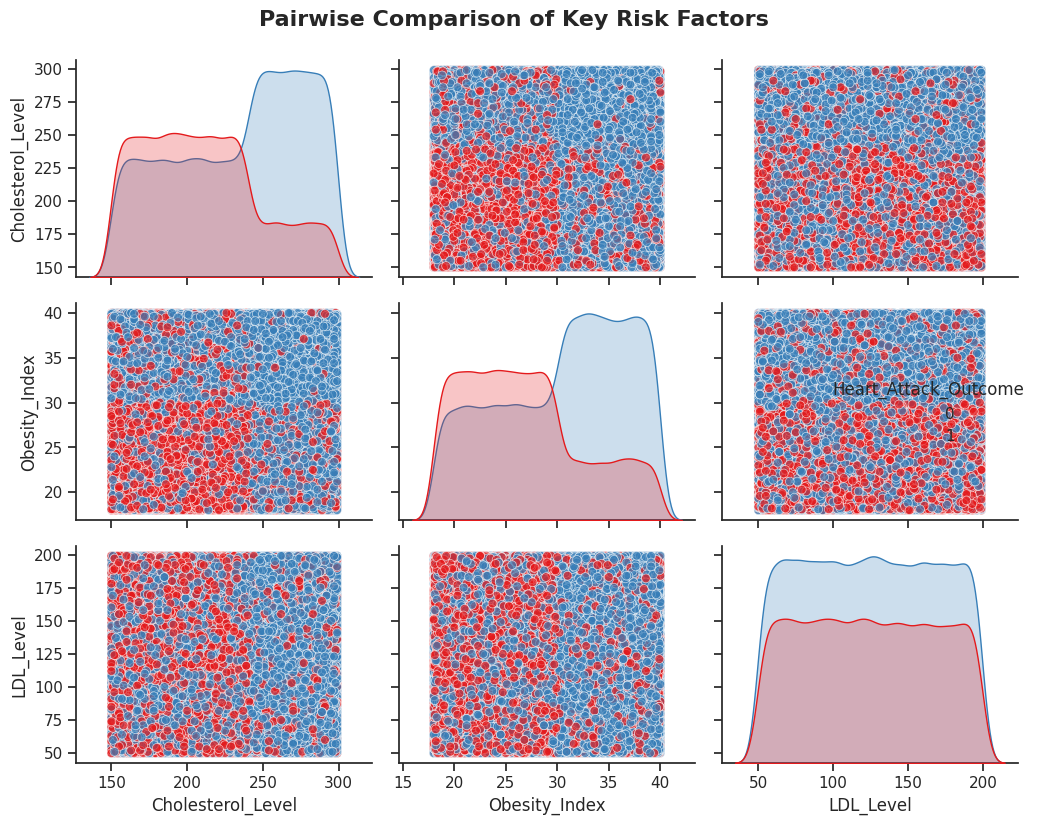

In [10]:
# Filter relevant columns and drop missing values
features = ['Cholesterol_Level', 'Obesity_Index', 'LDL_Level', 'Heart_Attack_Outcome']
df_subset = df[features].dropna()

# Convert Heart_Attack_Outcome to string for better legend display
df_subset['Heart_Attack_Outcome'] = df_subset['Heart_Attack_Outcome'].astype(str)

# Create the pairplot
sns.set(style="ticks")

plot = sns.pairplot(
    df_subset,
    hue="Heart_Attack_Outcome",        # Color by outcome
    diag_kind="kde",                   # Kernel density on the diagonal
    plot_kws={'s': 40, 'alpha': 0.7},  # Marker size and transparency
    height=2.8,                        # Size of each subplot
    palette='Set1'
)

# Add a super title
plot.fig.suptitle("Pairwise Comparison of Key Risk Factors", fontsize=16, fontweight='bold')
plot.fig.tight_layout()
plot.fig.subplots_adjust(top=0.92)  # Adjust to fit title

# Done — the plot should now show clearly in Google Colab
plt.show()


5. Violin Plot - Blood Pressure by Heart Attack Outcome
● Create a violin plot to compare Blood_Pressure_Systolic and
Blood_Pressure_Diastolic across heart attack outcomes.
● Adjust split=True to better visualize distributions.
● Title: "Blood Pressure Distribution by Heart Attack Outcome"
● X-axis Label: "Heart Attack Outcome (0 = No, 1 = Yes)"
● Y-axis Label: "Blood Pressure (mmHg)"

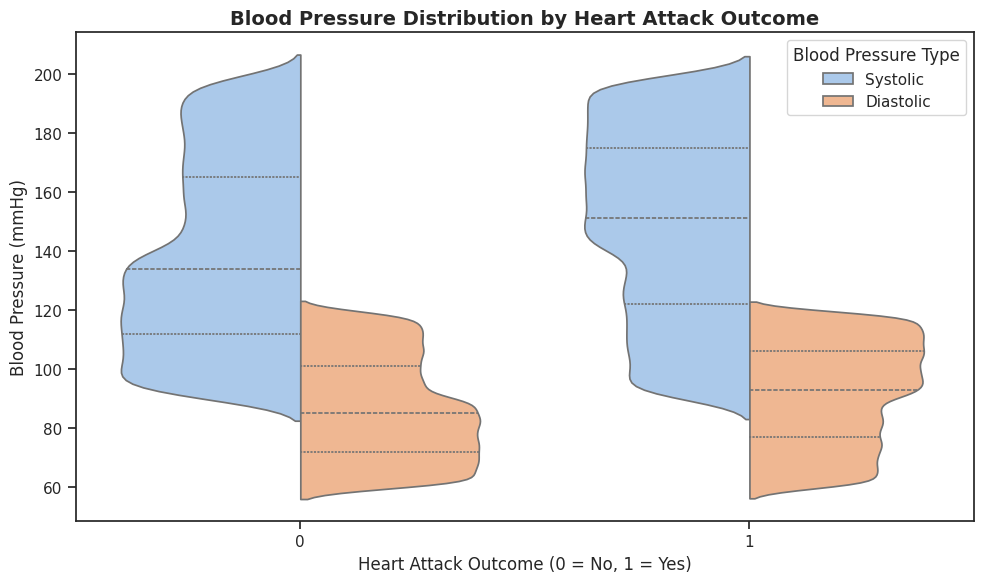

In [11]:
# Melt the data to long format for blood pressure columns
bp_df = df[['Heart_Attack_Outcome', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic']].dropna()

# Rename for clarity
bp_df = bp_df.rename(columns={
    'Blood_Pressure_Systolic': 'Systolic',
    'Blood_Pressure_Diastolic': 'Diastolic'
})

# Melt into long format
bp_long = pd.melt(
    bp_df,
    id_vars='Heart_Attack_Outcome',
    value_vars=['Systolic', 'Diastolic'],
    var_name='BP_Type',
    value_name='BP_Value'
)

# Convert outcome to string for better hue separation
bp_long['Heart_Attack_Outcome'] = bp_long['Heart_Attack_Outcome'].astype(str)

# Plot violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=bp_long,
    x='Heart_Attack_Outcome',
    y='BP_Value',
    hue='BP_Type',
    split=True,
    palette='pastel',
    inner='quartile'
)

# Add labels and title
plt.title('Blood Pressure Distribution by Heart Attack Outcome', fontsize=14, fontweight='bold')
plt.xlabel('Heart Attack Outcome (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Blood Pressure (mmHg)', fontsize=12)
plt.legend(title='Blood Pressure Type')

# Show the plot
plt.tight_layout()
plt.show()


6. Countplot - Smoking and Heart Attack Outcome
● Generate a countplot to visualize the number of smokers and non-smokers
across heart attack outcomes.
● Use a hue="Gender" parameter to compare distributions by gender.
● Title: "Smoking Status and Heart Attack Outcome by Gender"
● X-axis Label: "Smoking Status (Yes/No)"
● Y-axis Label: "Count

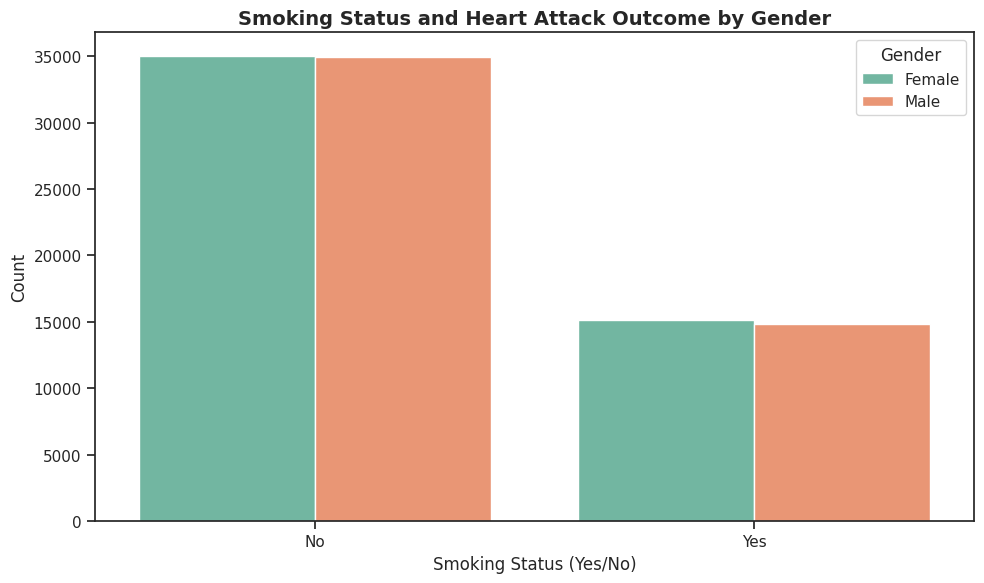

In [12]:
# Drop missing values in relevant columns
df_clean = df[['Smoking_Status', 'Heart_Attack_Outcome', 'Gender']].dropna()

# Convert Heart_Attack_Outcome to string for clarity in plot
df_clean['Heart_Attack_Outcome'] = df_clean['Heart_Attack_Outcome'].astype(str)

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_clean,
    x='Smoking_Status',
    hue='Gender',
    palette='Set2'
)

# Add titles and labels
plt.title('Smoking Status and Heart Attack Outcome by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status (Yes/No)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()
